# Objective: Detect fraud transaction by building a robust machine learning model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Siddharth Gupta\Downloads\Financial Datasets For Fraud Detection\archive\dataset.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore")

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time.

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - identifies a fraudulent transaction (1) and non fraudulent (0)

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [7]:
df.shape

(6362620, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [11]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
sum_by_type = df.groupby('type')['amount'].sum().reset_index()

print(sum_by_type)

       type          amount
0   CASH_IN 236367391912.46
1  CASH_OUT 394412995224.49
2     DEBIT    227199221.28
3   PAYMENT  28093371138.37
4  TRANSFER 485291987263.17


In [14]:
sum_by_type = df.groupby('type')['isFraud'].sum().reset_index()
print(sum_by_type)

Fraud_Transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
Fraud_Cashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.format(len(Fraud_Transfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.format(len(Fraud_Cashout)))

       type  isFraud
0   CASH_IN        0
1  CASH_OUT     4116
2     DEBIT        0
3   PAYMENT        0
4  TRANSFER     4097

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


In [15]:
sum_by_type_isFlaggedFraud  = df.groupby('type')['isFlaggedFraud'].sum().reset_index()
print(sum_by_type_isFlaggedFraud)

isFlaggedFraud_Transfer = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print ('\n The number of skeptic fraudulent TRANSFERs = {}'.format(len(isFlaggedFraud_Transfer)))

       type  isFlaggedFraud
0   CASH_IN               0
1  CASH_OUT               0
2     DEBIT               0
3   PAYMENT               0
4  TRANSFER              16

 The number of skeptic fraudulent TRANSFERs = 16


In [16]:
df[df['isFlaggedFraud']== 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.00,0.00,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.00,0.00,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.00,0.00,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.00,0.00,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.00,0.00,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.00,0.00,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.00,0.00,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.00,0.00,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.00,0.00,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.00,0.00,1,1


It turns out that the origin of isFlaggedFraud is unclear, contrasting with the description provided. The 16 entries (out of 6 million) where the isFlaggedFraud feature is set do not seem to correlate with any explanatory variable. The data is described as isFlaggedFraud being set when an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. In fact, as shown below, isFlaggedFraud can remain not set despite this condition being met.

In [17]:
Transfer_isFlaggedFraud = df.loc[df.type == 'TRANSFER']
flagged = df.loc[df.isFlaggedFraud == 1]
not_flagged = df.loc[df.isFlaggedFraud == 0]

print('The min amount transaction when isFlaggedFraud is set = {}'.format(flagged.amount.min()))
print('The max amount transaction when isFlaggedFraud is not set = {}'
      .format(Transfer_isFlaggedFraud.loc[Transfer_isFlaggedFraud.isFlaggedFraud == 0].amount.max()))

The min amount transaction when isFlaggedFraud is set = 353874.22
The max amount transaction when isFlaggedFraud is not set = 92445516.64


In [18]:
print('\nHave originators of transactions who flagged as fraud has transacted more than once? {}'
      .format((flagged.nameOrig.isin(pd.concat([not_flagged.nameOrig, not_flagged.nameDest]))).any()))


Have originators of transactions who flagged as fraud has transacted more than once? False


In [19]:
print('\nHow many destination accounts of transactions flagged as fraud have been the destination accounts more than once?: {}'
      .format(sum(flagged.nameDest.isin(not_flagged.nameDest))))


How many destination accounts of transactions flagged as fraud have been the destination accounts more than once?: 2


In [20]:
print('\nWithin fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? {}'
      .format((Fraud_Transfer.nameDest.isin(Fraud_Cashout.nameOrig)).any()))


Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


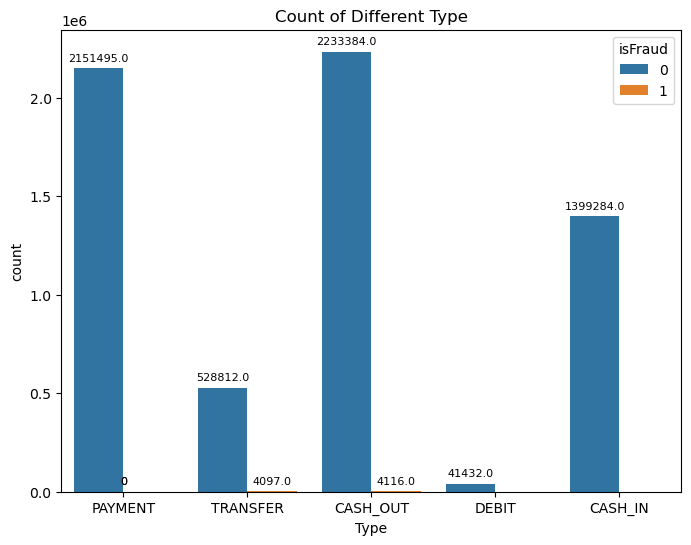

In [21]:
##Count  plot for categorical distribution
plt.figure(figsize=(8, 6))
count_plot = sns.countplot(x = 'type', data = df, hue = 'isFraud')
plt.title('Count of Different Type')
plt.xlabel('Type')

for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                        textcoords='offset points')
    
plt.show()

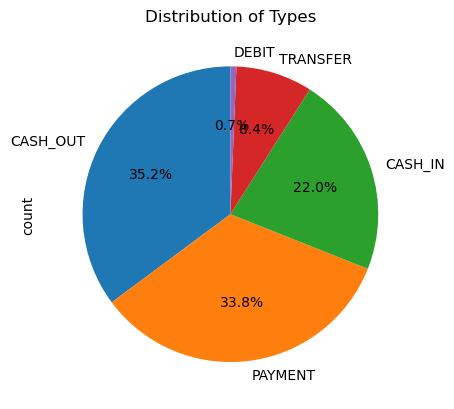

In [22]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Types')
plt.show()

In [23]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [25]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
df['type'] = encoder.fit_transform(df[['type']])
print(ohe)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [33]:
df.dtypes

step                int64
type              float64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [42]:
a = df.drop(['nameOrig','nameDest'],axis=1)

In [43]:
b = a.corr()

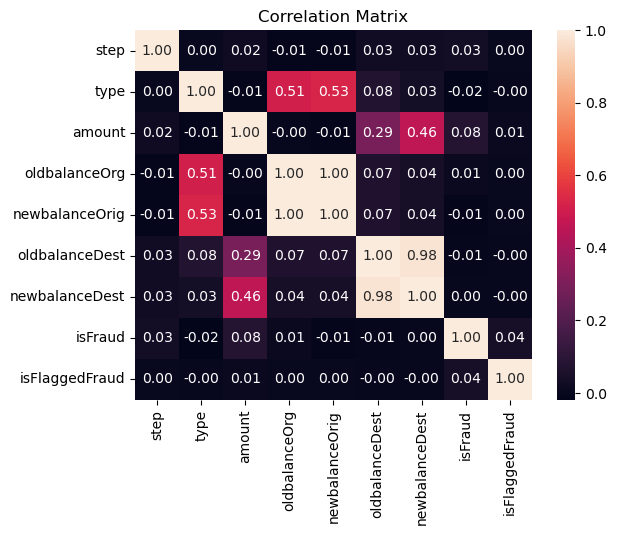

In [45]:
sns.heatmap(b, annot = True,fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [46]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Splitting Data

In [48]:
X = df.drop(['isFraud','isFlaggedFraud','nameOrig','nameDest'], axis =1 )
y = df['isFraud']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
X_train.shape

(4453834, 7)

In [57]:
X_test.shape

(1908786, 7)

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
model = sc.fit(X)
X = model.transform(X)
print(X)

[[-1.70304158 -0.53096525 -0.28155992 ... -0.2376217  -0.3238139
  -0.33341141]
 [-1.70304158 -0.53096525 -0.29476726 ... -0.2858123  -0.3238139
  -0.33341141]
 [-1.70304158 -0.53096525 -0.2975548  ... -0.29244171 -0.3238139
  -0.33341141]
 ...
 [ 3.51012348 -0.53096525 10.1539526  ... -0.29244171 -0.30366526
   1.403027  ]
 [ 3.51012348 -0.53096525  1.1097649  ... -0.29244171 -0.3238139
  -0.33341141]
 [ 3.51012348 -0.53096525  1.1097649  ... -0.29244171  1.59138312
   1.6698123 ]]


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

In [62]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
dt = DecisionTreeClassifier()
dt_gridcv = {'criterion' : ['gini', 'entropy', 'log_loss'],
            'max_depth': [10, 20, 30],
            'min_samples_split': [3, 6, 9],
            'splitter' : ['best', 'random']}
dt_clf = GridSearchCV(dt, dt_gridcv, cv = None)

In [67]:
dt_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'min_samples_split': [3, 6, 9],
                         'splitter': ['best', 'random']})

In [69]:
dt_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 3,
 'splitter': 'best'}

In [70]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted class labels
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Calculate and print AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc)

In [72]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression Results:")
evaluate_model(lr, X_test, y_test)

Logistic Regression Results:
Confusion Matrix:
[[1904535    1816]
 [   1380    1055]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.37      0.43      0.40      2435

    accuracy                           1.00   1908786
   macro avg       0.68      0.72      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy: 0.9983256373422689
AUC Score: 0.8849979180744243


In [73]:
print("Decision Tree Results:")
evaluate_model(dt_clf, X_test, y_test)

Decision Tree Results:
Confusion Matrix:
[[1906031     320]
 [    413    2022]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.86      0.83      0.85      2435

    accuracy                           1.00   1908786
   macro avg       0.93      0.92      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy: 0.9996159862865717
AUC Score: 0.9312916812937796
